In this project we will create a Convolutional Neural Network which will be able to predict whether a plant is suffering from a disease. We will use different layers and other hyperparameters for building, training and testing this classifictaion model.We will be using tensorflow and keras for this project.

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image

#from keras.preprocessing.image import img_to_array, array_to_img
#from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

Next we will import all the required libraries. As we are making a CNN model we will import all the required layers, activations, optimizers, etc.

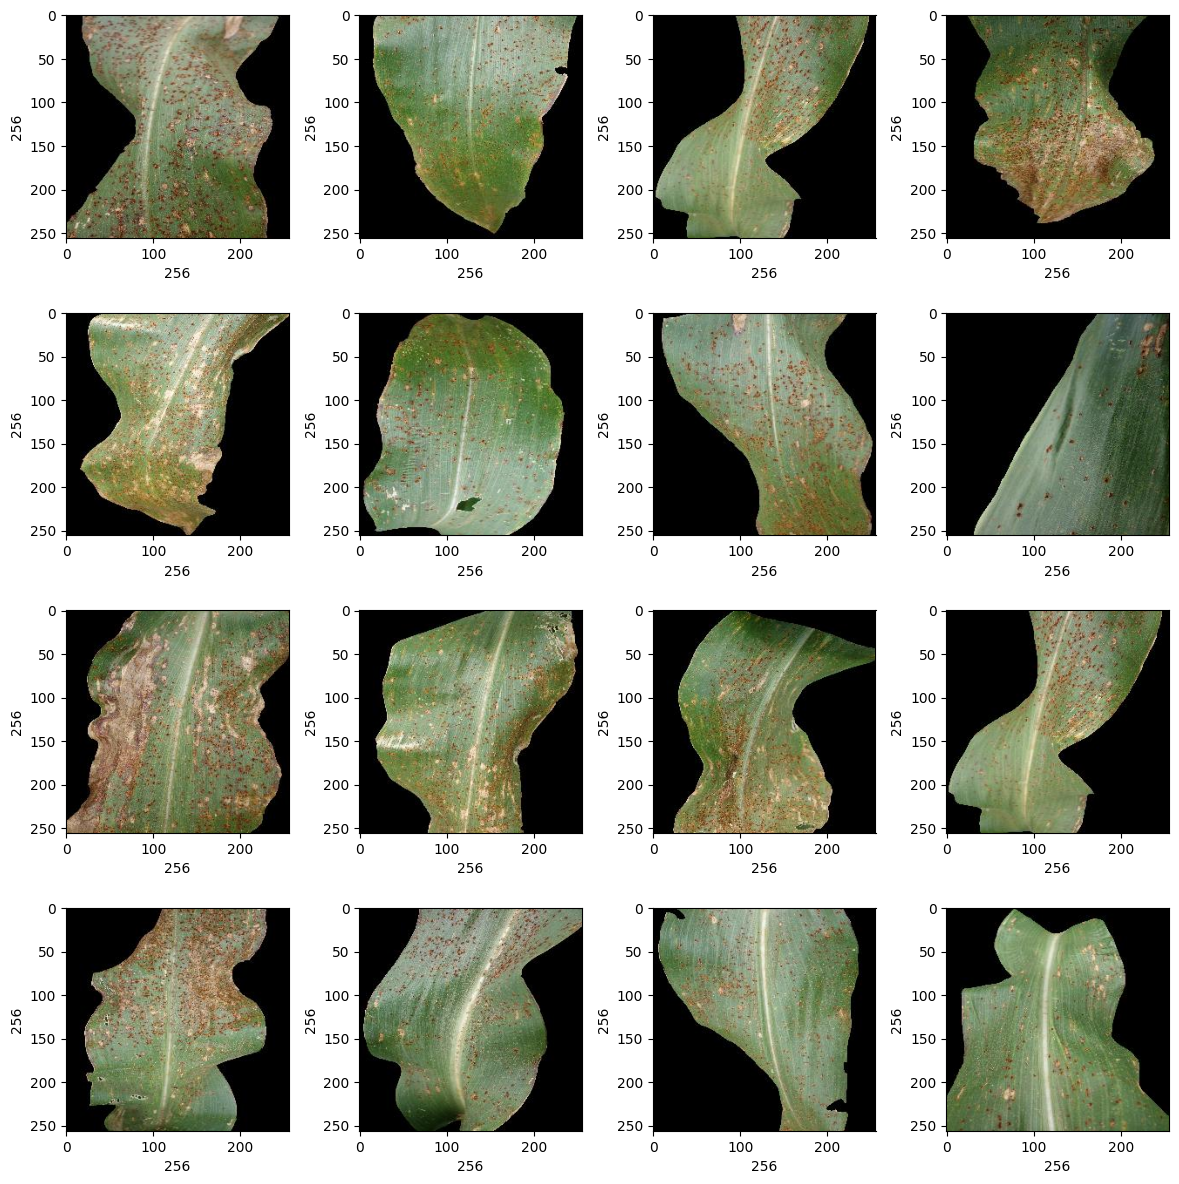

In [ ]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
#path = "/content/drive/MyDrive/Project Bank/plant_deseases_prediction/Plant_images_projectbank/Potato___Early_blight"
path = "/content/drive/MyDrive/plant disease prediction/Data/Plant_images_pianalytix/Corn_Common_rust"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

Now we will observe some of the iamges that are their in our dataset. We will plot 12 images here using the matplotlib library.

In [ ]:
#Converting Images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

After visualizing the images let us move forward and create a function which will convert the images into a numpy array. It is required because we will normalize our dataset after this.

In [ ]:

import os
from matplotlib.image import imread

dir = "/content/drive/MyDrive/plant disease prediction/Data/Plant_images_pianalytix"
image_list, label_list = [], []
all_labels = ['Corn_Common_rust', 'Potato_Early_blight', 'Tomato_Bacterial_spot']
binary_labels = [0, 1, 2]

# Reading and converting image to numpy array
for i, label in enumerate(all_labels):
    folder_path = os.path.join(dir, label)
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = imread(image_path)
        if image is not None:
            image = cv2.resize(image, (256, 256))
            image_list.append(image)
            label_list.append(binary_labels[i])

# Convert to NumPy arrays
x_data = np.array(image_list, dtype=np.float16)
y_data = np.array(label_list)

# Normalize pixel values
x_data = x_data / 255.0

# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=10)

# Reshape the data
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)

# Perform one-hot encoding on the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Print shapes
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(720, 256, 256, 3) (720, 3)
(180, 256, 256, 3) (180, 3)


Now we will convert all the images into numpy array.

In [ ]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

,count
0,
0,300
1,300
2,300


In [ ]:
label_list = np.array(label_list)
label_list.shape

(900,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

In [ ]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)
print(x_train.shape)
print(x_test.shape)

(720, 256, 256, 3)
(180, 256, 256, 3)


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 85, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 85, 85, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 42, 42, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │       225,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,347 (903.70 KB)

 Trainable params: 231,347 (903.70 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.save("/content/drive/My Drive/plant_disease.h5")
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('/content/drive/My Drive/plant_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
model.save_weights('/content/drive/My Drive/plant_model.weights.h5')

Saving the model using different techniques.

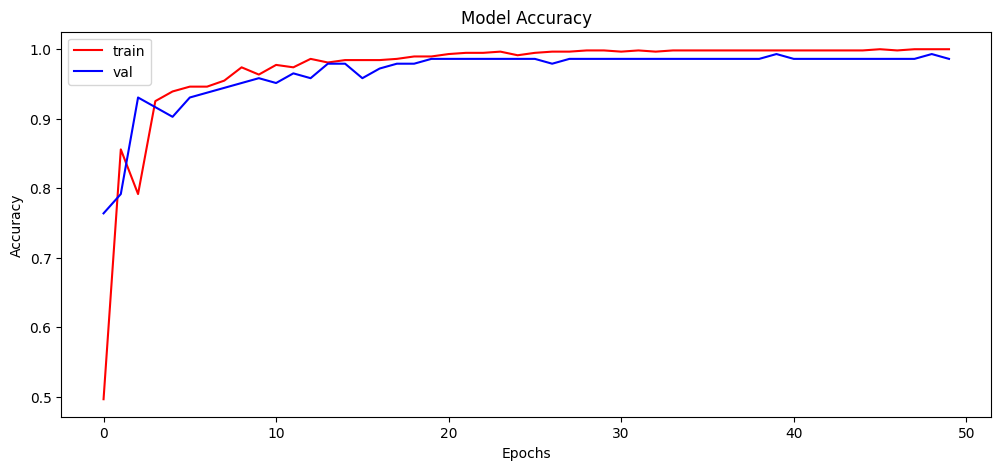

In [ ]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

Next we will plot the accuracy of the model for the trainig history.

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9950 - loss: 0.0240
Test Accuracy: 98.88888597488403


Evaluating the model to know the accuracy of the model.


Next we will use our model to predict predicting the testing dataset label.

In [ ]:
# Plotting image to compare
img_idx=int(input())
img = array_to_img(x_test[img_idx])
img.show()


0


In [ ]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[img_idx])])
print("Predicted : ",all_labels[np.argmax(y_pred[img_idx])])

Originally :  Potato_Early_blight
Predicted :  Potato_Early_blight


In [ ]:
image_dir="/content/drive/MyDrive/plant disease prediction/Data/Plant_images_pianalytix/Corn_Common_rust/RS_Rust 2469.JPG"
image = cv2.imread(image_dir)
if image is not None :
    image = cv2.resize(image, (256,256))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    array_to_img(image).show()
   # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #image_array = img_to_array(image)

In [ ]:
result = model.predict(np.array([image]))
all_labels[np.argmax(result)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


'Corn_Common_rust'